In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/Users/thientramvu/Documents/Data/PY20/Big Mart Sales/BigMartSales_TRAIN.csv')
test = pd.read_csv('/Users/thientramvu/Documents/Data/PY20/Big Mart Sales/BigMartSales_TEST.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)

In [6]:
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [8]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [11]:
data.source.dtype

dtype('O')

In [12]:
columns = data.drop(columns=['Item_Identifier', 
                             'Outlet_Identifier', 
                             'source']).columns.values
for col in columns:
    if data[col].dtypes == 'O':
        print(data[col].value_counts(),'\n')

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64 

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64 

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64 

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64 



## Data cleaning

In [13]:
# Checking duplication
data.duplicated().sum()

0

### Fill null values in Item_Weight

In [14]:
# Checking whether an item has different weights across all stores
(data.groupby('Item_Identifier').Item_Weight.nunique() > 1).sum()

0

In [15]:
Item_weight = data[data.Item_Weight.isna()==False].groupby('Item_Identifier').Item_Weight.unique()
Item_weight

Item_Identifier
DRA12     [11.6]
DRA24    [19.35]
DRA59     [8.27]
DRB01     [7.39]
DRB13    [6.115]
          ...   
NCZ30     [6.59]
NCZ41    [19.85]
NCZ42     [10.5]
NCZ53      [9.6]
NCZ54    [14.65]
Name: Item_Weight, Length: 1559, dtype: object

In [16]:
def weight(item):
    return Item_weight[item][0]

In [17]:
data.loc[data.Item_Weight.isna()==True, 'Item_Weight'] = data.loc[data.Item_Weight.isna()==True, 'Item_Identifier'].apply(weight)
data.Item_Weight.isna().sum()

0

### Fill null values in Outlet_Size

In [18]:
mode = data.groupby(['Outlet_Type']).Outlet_Size.agg(pd.Series.mode)
mode

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [19]:
# For checking: Supermarket Type 1 before filling null values
data[data.Outlet_Type=='Supermarket Type1'].groupby(['Outlet_Identifier']).Outlet_Size.value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [20]:
data.loc[data.Outlet_Size.isna()==True, 'Outlet_Size'] = data.loc[data.Outlet_Size.isna()==True, 'Outlet_Type'].apply(lambda x: mode[x])


In [21]:
# For checking: Supermarket Type 1 after filling null values
data[data.Outlet_Type=='Supermarket Type1'].groupby(['Outlet_Identifier']).Outlet_Size.value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT017             Small          1543
OUT035             Small          1550
OUT045             Small          1548
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [22]:
data.Outlet_Size.isna().sum()

0

### Adjusting Item_Visibility

In [23]:
(data.Item_Visibility == 0).sum()

879

In [24]:
# Average item visibility per item ID
avg_visi = data.groupby('Item_Identifier').Item_Visibility.mean()
avg_visi

Item_Identifier
DRA12    0.034938
DRA24    0.045646
DRA59    0.133384
DRB01    0.079736
DRB13    0.006799
           ...   
NCZ30    0.027302
NCZ41    0.056396
NCZ42    0.011015
NCZ53    0.026330
NCZ54    0.081345
Name: Item_Visibility, Length: 1559, dtype: float64

In [25]:
data.loc[data.Item_Visibility == 0, 'Item_Visibility'] = data.loc[data.Item_Visibility == 0, 'Item_Identifier'].apply(lambda x: avg_visi[x])
(data.Item_Visibility == 0).sum()

0

## Feature engineering

### Creating Visibility ratio

In [26]:
# The visibility of an item in a particular store 
# as compared to the mean visibility of that item across all stores
# showing how much important the item is to that store as compared to other stores

data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/avg_visi[x['Item_Identifier']], axis=1)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

### Grouping Item_Type

In [27]:
data['Item_Group'] = data.Item_Identifier.str[0:2]
data['Item_Group'] = data['Item_Group'].map({'FD': 'Other food',
                                             'DR': 'Drink',
                                             'NC': 'Non-consumable'})
data.Item_Group.value_counts()

Other food        10201
Non-consumable     2686
Drink              1317
Name: Item_Group, dtype: int64

In [28]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
Freshfood = ['Meat', 'Fruits and Vegetables', 'Breakfast', 'Seafood', 'Breads']
Storedfood = ['Dairy', 'Snack Foods', 'Frozen Foods', 'Canned', 'Starchy Foods']

In [30]:
def group(row):
    if row['Item_Type'] in Freshfood:
        return 'Fresh food'
    elif row['Item_Type'] in Storedfood:
        return 'Stored food'
    else:
        return row['Item_Group']

In [31]:
data['Item_Group'] = data.apply(group, axis=1)
data.Item_Group.value_counts()

Stored food       5904
Fresh food        3440
Non-consumable    2686
Drink             1088
Other food        1086
Name: Item_Group, dtype: int64

### Formating Item_Fat_Content

In [32]:
def formatting(row):
    if row == 'LF' or row == 'low fat':
        return 'Low Fat'
    elif row == 'reg':
        return 'Regular'
    else:
        return  row

In [33]:
data['Item_Fat_Content'] = data.Item_Fat_Content.apply(formatting)
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [34]:
data.loc[data.Item_Group == 'Non-consumable','Item_Fat_Content'] = 'Non-edible'
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-edible    2686
Name: Item_Fat_Content, dtype: int64

### Defining years of operation

In [35]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Converting categorical variables to binary variables

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode Outlet ID to labels,
# add new columns - Outlet_Label to DataFrame
data['Outlet_Label'] = le.fit_transform(data['Outlet_Identifier'])

In [37]:
data['Outlet_Label']

0        9
1        3
2        9
3        0
4        1
        ..
14199    8
14200    3
14201    7
14202    2
14203    7
Name: Outlet_Label, Length: 14204, dtype: int64

In [38]:
# Encode categorical columns
cate = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Group','Outlet_Type']
le = LabelEncoder()
for col in cate:
    data[col] = le.fit_transform(data[col])

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Group,Outlet_Years,Outlet_Label
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,0.931078,4,14,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0.933420,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,0.960069,1,14,9
3,FDX07,19.20,2,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,1.000000,1,15,0
4,NCD19,8.93,1,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,1.000000,2,26,1


In [40]:
# Convert categorical variables to binary variables
data = pd.get_dummies(data, columns=['Item_Fat_Content',
                                     'Outlet_Location_Type',
                                     'Outlet_Size',
                                     'Outlet_Type',
                                     'Item_Group',
                                     'Outlet_Label'])

In [41]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Group_0                   uint8
Item_Group_1                   uint8
Item_Group_2                   uint8
I

### Exporting data for training

In [42]:
data = data.drop(columns=['Item_Type', 'Outlet_Establishment_Year'])

train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

train = train.drop(columns=['source'])
test = test.drop(columns=['source', 'Item_Outlet_Sales'])

train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

## Final data checking before training

In [43]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_Label_0,Outlet_Label_1,Outlet_Label_2,Outlet_Label_3,Outlet_Label_4,Outlet_Label_5,Outlet_Label_6,Outlet_Label_7,Outlet_Label_8,Outlet_Label_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873623,0.069941,140.992782,2181.288914,1.063028,15.168133,0.459697,0.187610,0.352693,0.280183,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,4.645893,0.049856,62.275067,1706.499616,0.239749,8.371760,0.498402,0.390423,0.477836,0.449115,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,4.555000,0.003575,31.290000,33.290000,0.850394,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.785000,0.031228,93.826500,834.247400,0.925131,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.057249,143.012800,1794.331000,0.999070,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.850000,0.097383,185.643700,3101.296400,1.042001,26.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,13086.964800,3.010094,28.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
train.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True)
test.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True)

In [45]:
cate = train.iloc[:,6:]

for col in cate.columns:
    print(col)
    print(cate[col].value_counts(), '\n')

Item_Fat_Content_0
0    4605
1    3918
Name: Item_Fat_Content_0, dtype: int64 

Item_Fat_Content_1
0    6924
1    1599
Name: Item_Fat_Content_1, dtype: int64 

Item_Fat_Content_2
0    5517
1    3006
Name: Item_Fat_Content_2, dtype: int64 

Outlet_Location_Type_0
0    6135
1    2388
Name: Outlet_Location_Type_0, dtype: int64 

Outlet_Location_Type_1
0    5738
1    2785
Name: Outlet_Location_Type_1, dtype: int64 

Outlet_Location_Type_2
0    5173
1    3350
Name: Outlet_Location_Type_2, dtype: int64 

Outlet_Size_0
0    7591
1     932
Name: Outlet_Size_0, dtype: int64 

Outlet_Size_1
0    5730
1    2793
Name: Outlet_Size_1, dtype: int64 

Outlet_Size_2
1    4798
0    3725
Name: Outlet_Size_2, dtype: int64 

Outlet_Type_0
0    7440
1    1083
Name: Outlet_Type_0, dtype: int64 

Outlet_Type_1
1    5577
0    2946
Name: Outlet_Type_1, dtype: int64 

Outlet_Type_2
0    7595
1     928
Name: Outlet_Type_2, dtype: int64 

Outlet_Type_3
0    7588
1     935
Name: Outlet_Type_3, dtype: int64 

Item_G

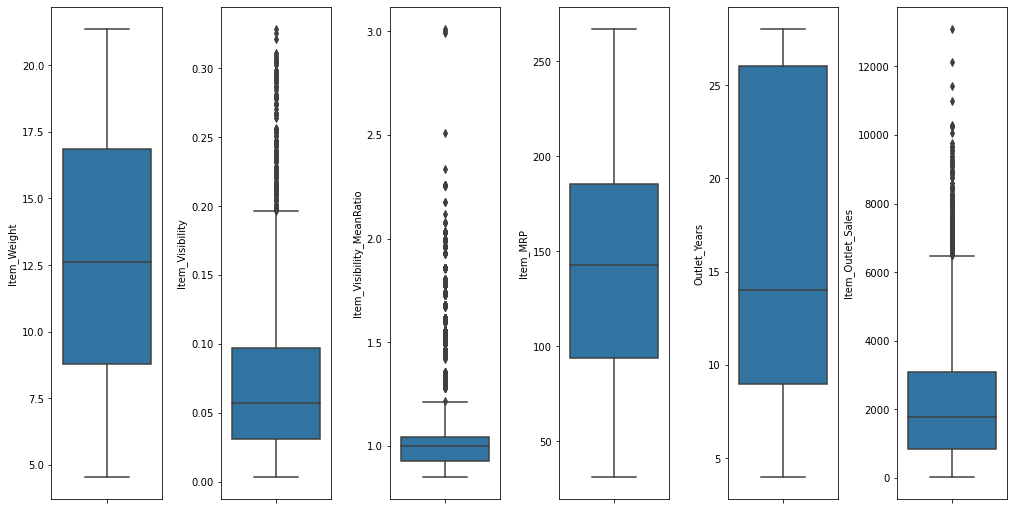

In [61]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_Visibility_MeanRatio', 'Item_MRP', 'Outlet_Years', 'Item_Outlet_Sales']
plot = train[cols]

fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(14, 7))
index = 0
axs = axs.flatten()
for k,v in plot.items():
    sns.boxplot(data=plot,
                y=k,
                ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.savefig('BigMart_outliers_5.png', dpi=300,bbox_inches='tight')

plt.show()

In [62]:
for k, v in plot.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(plot)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Item_Weight outliers = 0.00%
Column Item_Visibility outliers = 1.67%
Column Item_Visibility_MeanRatio outliers = 14.27%
Column Item_MRP outliers = 0.00%
Column Outlet_Years outliers = 0.00%
Column Item_Outlet_Sales outliers = 2.18%


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[]

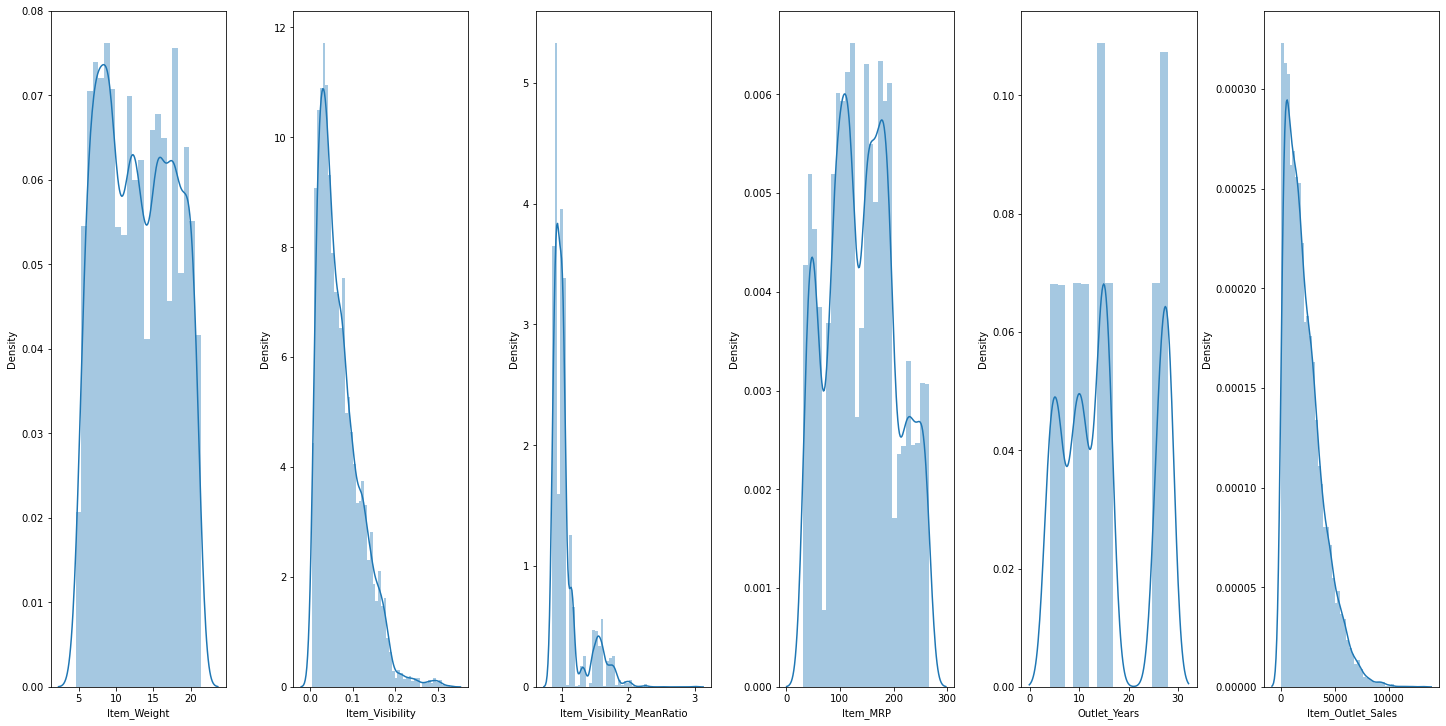

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
# fig.delaxes(axs[4,6])
# fig.delaxes(axs[4,5])

index = 0
axs = axs.flatten()
for k,v in plot.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.savefig('BigMart_distribution_5.png', dpi=300,bbox_inches='tight')
plt.plot()

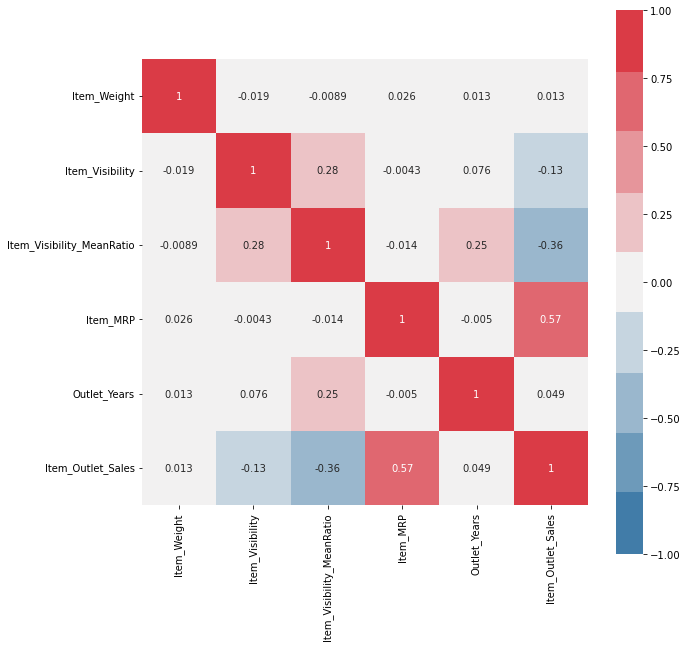

In [64]:
# correlation of non-categorical variables with result

cor = plot.corr(method='pearson')

# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9),
    square=True,
    ax=ax,
    annot=True
)
plt.savefig('BigMart_heat_5.png', dpi=300,bbox_inches='tight')

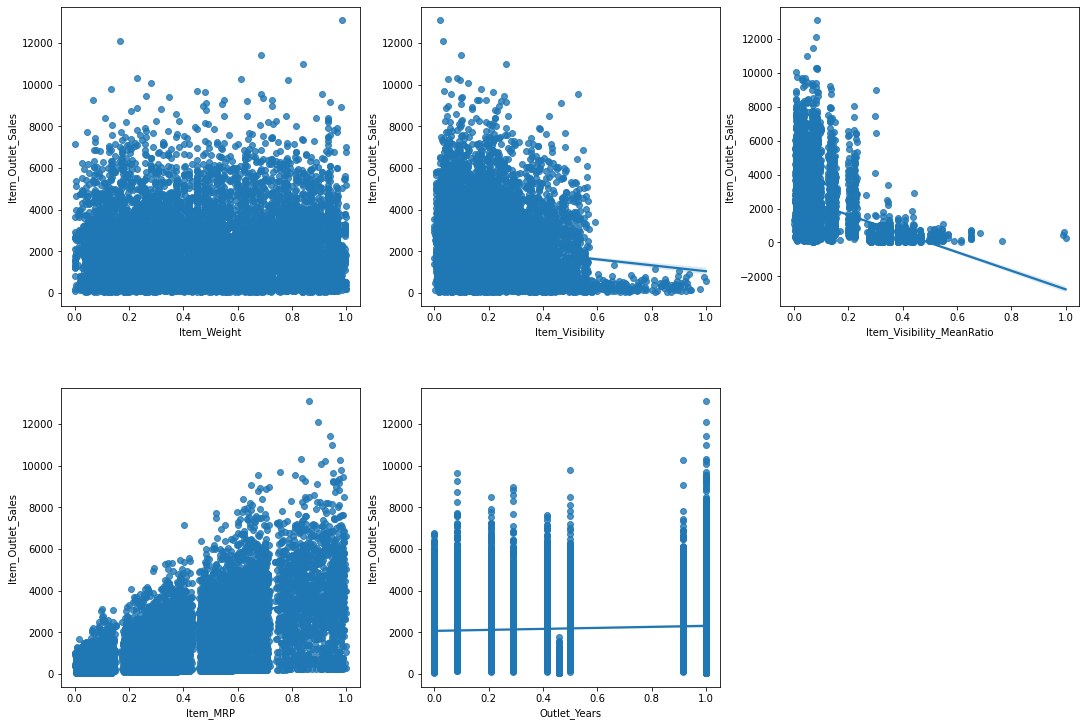

In [65]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
col = ['Item_Weight', 'Item_Visibility', 'Item_Visibility_MeanRatio', 'Item_MRP', 'Outlet_Years']
x = plot[col]
y = plot['Item_Outlet_Sales']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=col)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.delaxes(axs[1,2])

index = 0
axs = axs.flatten()
for i, k in enumerate(col):
    sns.regplot(y=y, x=x[k], ax=axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.savefig('BigMart_scatter_5.png', dpi=300,bbox_inches='tight')